# Which Pittsburgh Tech Groups Are Thriving the Most?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### First, let's load in the dataset.

In [2]:
# The dataset we will be using can be found at my github.
# It was obtained via the meetup.com API using a custom python script I created.
# If you'd like to generate a more recent dataset on Pittsburgh and/or a different location, 
# check out https://github.com/awgraves/meetup_api
df = pd.read_csv("pgh_meetup_groups_Jan_23_2018.csv")
df.head()

,name,id,city,lat,lon,category,created,status,members,join_mode,past_event_count,last_event,last_rsvp
0,Free and Almost Free in Pittsburgh,1756412,Pittsburgh,40.47,-79.95,Socializing,2010-12-30 23:15:54,active,17740,open,9864,2018-01-22 19:00:00,1
1,The Pittsburgh Hiking Meetup Group,513500,Pittsburgh,40.45,-79.99,Outdoors & Adventure,2007-05-29 06:48:49,active,6873,approval,3925,2018-01-23 06:15:00,3
2,Pittsburgh Singles Over-50 Meetup,21721579,Pittsburgh,40.45,-79.99,Socializing,2016-12-30 22:38:58,active,547,approval,74,2018-01-17 17:45:00,25
3,The Pittsburgh Cultural Arts Meetup Group,1318900,Pittsburgh,40.44,-79.95,Arts & Culture,2008-11-10 20:40:33,active,6245,open,1237,2018-01-21 16:25:00,4
4,The Pittsburgh Social Club!,1773927,Pittsburgh,40.47,-79.92,Socializing,2011-01-27 19:15:11,active,5304,open,3595,2018-01-22 19:00:00,6


In [3]:
df.shape

(935, 13)

### Let's only look at Pittsburgh and not the surrounding area:

In [4]:
df = df[df["city"]=="Pittsburgh"]
df.reset_index(drop=True, inplace=True)
df.shape

(683, 13)

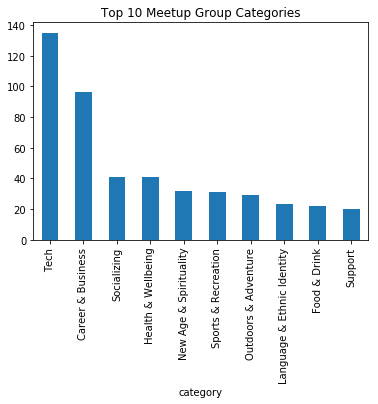

In [5]:
%matplotlib inline

cat_group_counts = df.groupby("category").size().sort_values(ascending=False)[:10]

cat_group_counts.plot(kind="bar", title="Top 10 Meetup Group Categories")

In [6]:
print(cat_group_counts.keys().tolist())

['Tech', 'Career & Business', 'Socializing', 'Health & Wellbeing', 'New Age & Spirituality', 'Sports & Recreation', 'Outdoors & Adventure', 'Language & Ethnic Identity', 'Food & Drink', 'Support']


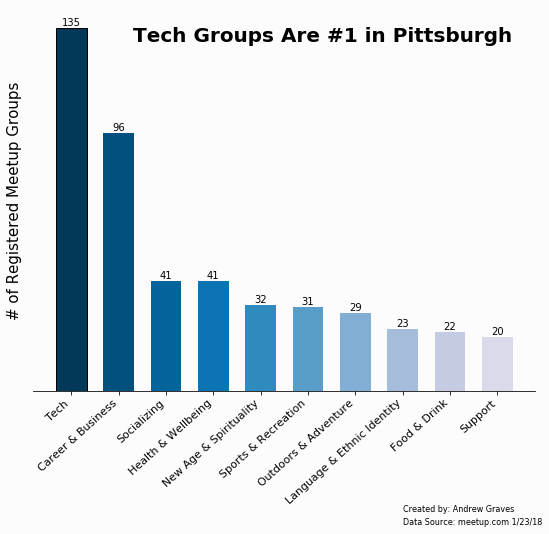

In [12]:
from matplotlib import cm
color = cm.PuBu(np.linspace(1, .2, 10))

N = 10
group_values = cat_group_counts.tolist()
group_labels = cat_group_counts.keys().tolist()

ind = np.arange(N)  # the x locations for the groups
width = 0.65       # the width of the bars

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1)
fig.set_facecolor(".99")

#line_widths = [3.0 if i == 1 else 1.0 for i in range(N)]
groups = ax.bar(ind, group_values, width, color=color, linewidth=1.0, edgecolor = "black")

# add some text for labels, title and axes ticks
ax.set_ylabel('# of Registered Meetup Groups', size=15)
# ax.set_title('Tech Groups Predominate in Pittsburgh', size=20, loc="right", weight="bold")
ax.set_xticks(ind)
ax.set_xticklabels(group_labels, rotation = 42, ha="right", size = 11)
ax.tick_params(left="off")
ax.set_yticklabels([])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_facecolor(".99")

ax.text(1.30,130,"Tech Groups Are #1 in Pittsburgh", horizontalalignment='left', size = 20, weight="bold")
ax.text(7.0, -45, "Created by: Andrew Graves", horizontalalignment="left", size=8)
ax.text(7.0, -50, "Data Source: meetup.com 1/23/18", horizontalalignment="left", size=8)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + .2,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(groups)

plt.savefig('tech_groups_pgh.jpeg', bbox_inches='tight', edgecolor='black', facecolor=fig.get_facecolor(), frameon=True)
plt.show()

In [ ]:
#only want tech groups
df = df[df["category"]=="Tech"].reset_index(drop=True)

#our category column is now redundant
df.drop(["category"], axis = 1, inplace = True)

In [ ]:
df.shape

In [ ]:
#get rid of some unnecessary columns
df.drop(["id","city","lat","lon"], inplace = True, axis = 1)

In [ ]:
df.head()

In [ ]:
# We don't want to join a group that is in a grace period!
df.status.value_counts()

In [ ]:
#Take only the active groups
df = df[df["status"] == "active"]

#The status column is now redundant
df.drop(["status"], axis = 1, inplace = True)
df.shape

In [ ]:
#we also don't really care about how members join
df.drop(["join_mode"], axis = 1, inplace = True)

In [ ]:
#one more filtering criteria:  no missing values.  The last_event column is a datetime object,
#and if there were any groups with no past events, this column will be a NaN (missing value).
df.dropna(axis = 0, inplace = True)
df.reset_index(inplace=True, drop=True)
df.shape

In [ ]:
#lastly, let's convert our datetime columns for later use
df["created"] = pd.to_datetime(df["created"])
df["last_event"] = pd.to_datetime(df["last_event"])
df.head()

## So, let's begin with the most obvious metric: membership.  

## The more members, the more thriving the group, right?  Let's take a look:

In [ ]:
top_membership = df.sort_values("members", ascending=False).reset_index(drop=True)
top_membership.head(5)

### Wow, not bad!  The top groups range from roughly 1.5 to 3.5 k members each!

### But wait a moment...take a look at those event rsvp counts...

### A thriving group should also have lots of rsvps, right?  Hmm...

## Ok, let's sort the groups by last rsvp count:

In [ ]:
top_rsvp = df.sort_values("last_rsvp", ascending=False).reset_index(drop=True)
top_rsvp.head(5)

## PGH Data Science tops the ranking at 72!  
(As it so happens, I was at that event, and we did not have 72 people.  I would estimate it was probably more like 40.  Still pretty good!)

## RSVP count does seem like another metric for vitality.

Yet, check out the Google Developer Group in slot 2.  It has only had **3 events in the past year!**

## Why don't we rank groups by how active they have been?


One way to do this would be to see ***which groups have had the most events.***  However, this would **bias our results towards groups that have been around longer.** 

On the other hand, if we ***rank the groups by how recent their most recent event was***, this might not tell us how frequent the groups **USUALLY** have events.

## A good solution is therefore to find the average wait time between events.  
We can calculate this by dividing the age of the group by the number of events it has had.

In [ ]:
# We can create a new column with a measure of how frequently the group hosts events.
# One way to do this is to divide the age of the group in days by the number of past events.
# This will tell us, on average, how many days go by in between events.

#we won't be needing the last event info now
df.drop(["last_event"], axis = 1, inplace=True)

#this is when the dataset was created, so we will use it to calculate group age:
query_date = dt.date(2018,1,23) 

df["created"] = [d.date() for d in df["created"]] #we only need the date from the original column (ignore time)
age = query_date - df["created"] #find the age in days
df["event_freq"] = age.dt.days / df["past_event_count"].astype(float)

In [ ]:
most_active = df.sort_values("event_freq").reset_index(drop=True)
most_active.head(5)

## Looks like the top groups hold events on a weekly basis

## For the 2nd time now Pittsburgh Code & Supply takes a top slot!

# We now have 3 criteria to evaluate and rank the tech groups:
- total membership
- last rsvp count
- event frequency

## Let's convert the scores for the criteria into percentiles and then average them for our final ranking!

In [ ]:
from scipy.stats import percentileofscore

#first we need to create sorted arrays of the column data
sorted_membership = sorted(most_active["members"])
sorted_rsvp = sorted(most_active["last_rsvp"])
sorted_freq = sorted(most_active["event_freq"])

#now we can use the percentile function on the columns and calculate our scores

most_active["membership_score"] = most_active["members"].apply(lambda x: percentileofscore(sorted_membership, x))
most_active["rsvp_score"] = most_active["last_rsvp"].apply(lambda x: percentileofscore(sorted_rsvp, x))

#When it comes to frequency, smaller is better, so we subtract the percentile from 100 to reward groups with more frequent events!
most_active["freq_score"] = 100 - (most_active["event_freq"].apply(lambda x: percentileofscore(sorted_freq, x)))

#average the 3 scores for our final score and sort the dataframe on this final score
most_active["FINAL SCORE"] = most_active[["membership_score","rsvp_score","freq_score"]].mean(axis=1)
most_active.sort_values("FINAL SCORE", inplace = True, ascending = False)
most_active.reset_index(drop=True, inplace = True)

final_df = most_active[["name","membership_score","rsvp_score","freq_score","FINAL SCORE"]]
final_df.head(10)

# Here are our top ten most thriving tech groups in Pittsburgh!

### [Take it further]: should we weight any of the categories more heavily than the others or keep them all equal when we calculate the final score?